<a href="https://colab.research.google.com/github/gloriagutierrez2025/optimizaci-n-aeroportuaria/blob/main/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd


In [18]:
datos=pd.read_csv('/content/flights.csv')
datos.shape

(71175, 11)

In [19]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [20]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

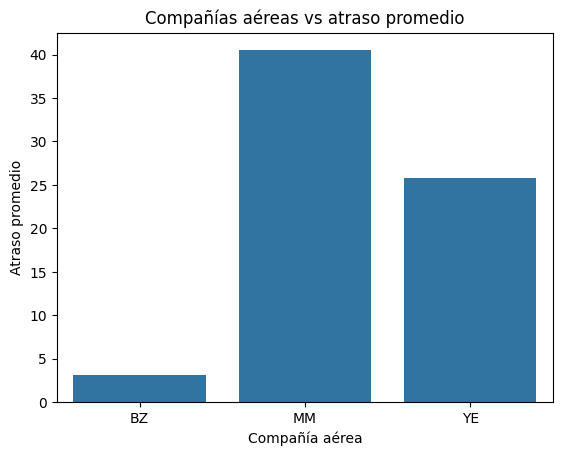

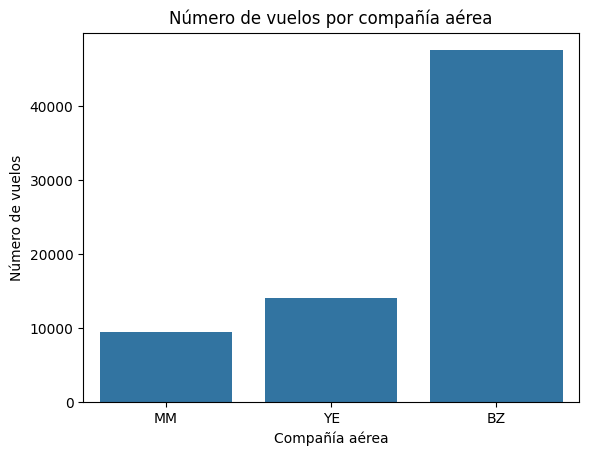

In [23]:
avg_delay=datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

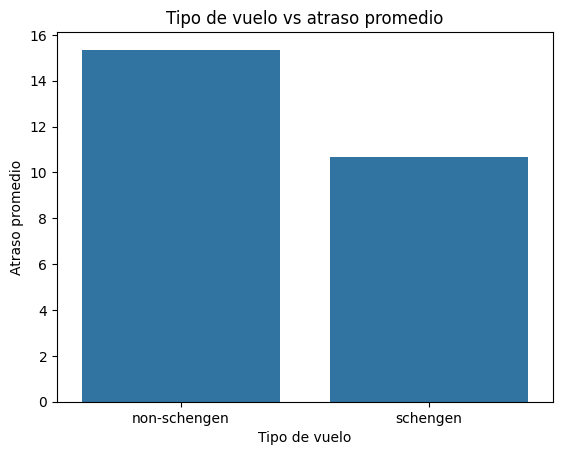

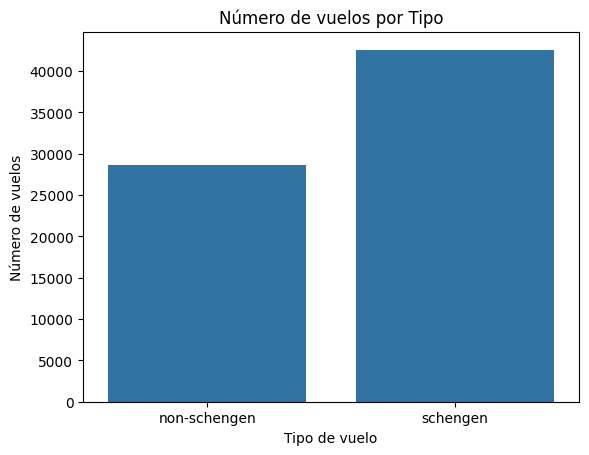

In [24]:
avg_delay=datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

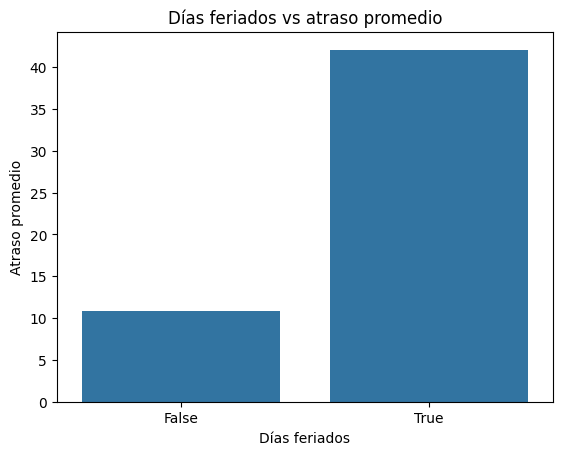

In [25]:
avg_delay=datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio')
plt.show()

In [26]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

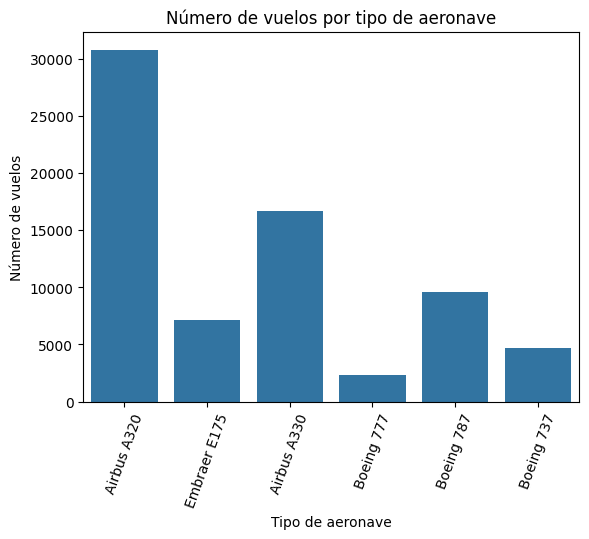

In [27]:
datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type')
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

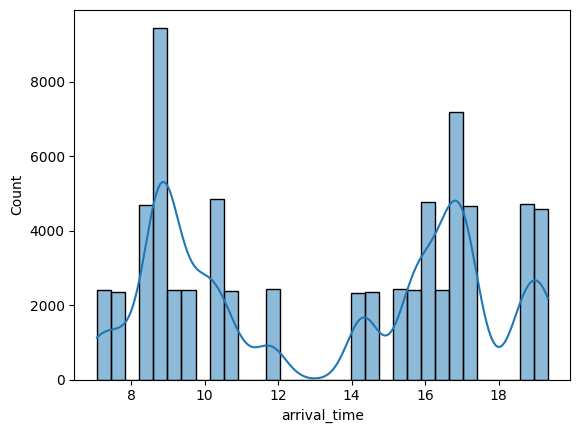

In [13]:
sns.histplot(data=datos, x='arrival_time',kde=True)


In [14]:
import numpy as np
def ancho_bin(df,columna):
    q75, q25 = np.percentile(df[columna], [75, 25])
    iqr= q75 - q25
    ancho= 2 * iqr * np.power(len(df[columna]), -1/3)
    return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

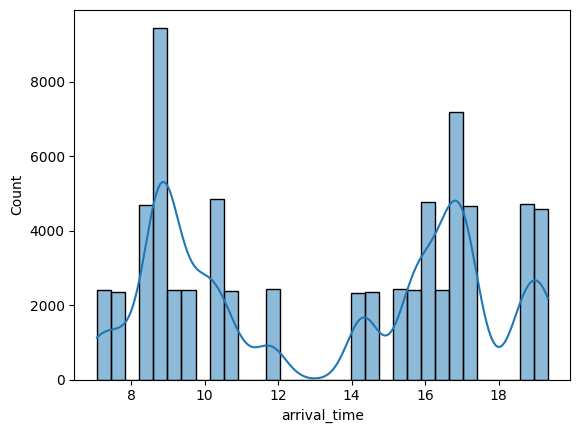

In [15]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth = binwidth)

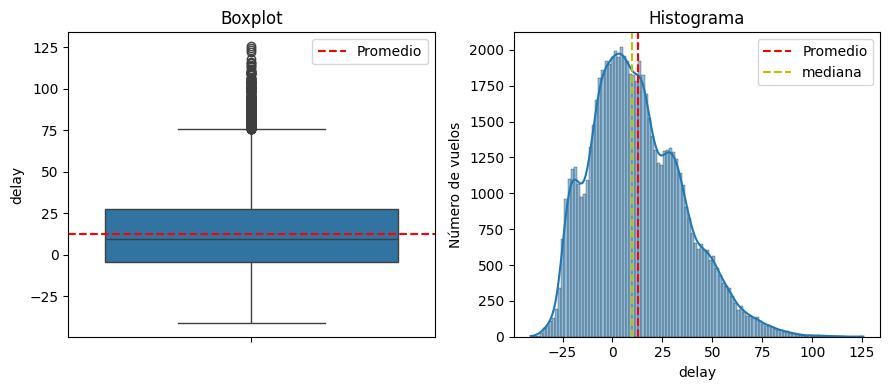

In [16]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data = datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y = atraso_promedio, color='r', linestyle='--',label='Promedio')
ax[0].legend()

binwidth=ancho_bin(datos,'delay')
sns.histplot(data = datos,x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='mediana')
ax[1].legend()

plt.tight_layout()

plt.show()


**CLASE DOS**

In [28]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [29]:
datos['date'] = datos['year'].astype(str) +'-'+(datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'],format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [30]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
31770,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,293,2015,False,49.875222,2015-10-21,False,Wednesday
14445,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,233,2012,False,-2.966064,2012-08-21,False,Tuesday
2560,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,170,2010,False,-24.625924,2010-06-20,True,Sunday
12949,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,133,2012,False,85.693654,2012-05-13,True,Sunday
57107,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,157,2020,False,-0.100211,2020-06-06,True,Saturday


In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [32]:
import warnings

warnings.filterwarnings('ignore')

In [33]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
15072,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,274,2012,0,-17.626879,2012-10-01,0,Monday
61347,1,BZ,Airbus A320,0,CNU,15.496519,18.496519,74,2021,0,-4.158851,2021-03-16,0,Tuesday
14006,11,BZ,Airbus A320,0,EMM,10.177197,13.177197,203,2012,0,17.181031,2012-07-22,1,Sunday


In [34]:
categoricas = ['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
datos_codificados =pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
27771,16,0,17.041281,20.041281,26,2015,0,51.894722,2015-01-27,0,...,0,0,0,0,0,0,0,0,1,0
65549,14,1,7.708301,11.708301,354,2021,0,-8.040488,2021-12-21,0,...,0,0,1,0,0,0,0,0,1,0
37600,3,1,18.635384,22.635384,316,2016,0,-32.493790,2016-11-12,1,...,0,1,0,0,0,1,0,0,0,0
70565,11,0,10.177197,13.177197,324,2022,0,-0.666436,2022-11-21,0,...,0,0,0,0,1,0,0,0,0,0
50455,27,1,14.376052,16.376052,78,2019,0,-2.491625,2019-03-20,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [37]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [38]:
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
13020,0,8.885071,0,35.169642,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
27329,1,14.376052,0,1.116879,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48235,0,10.172731,0,-24.308160,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
50113,1,19.196804,0,16.778196,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
5945,1,19.196804,0,-0.913826,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
49625,0,15.967963,0,-19.392068,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
22649,1,19.196804,0,16.250095,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
29664,0,10.177197,0,0.780455,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
68011,0,10.172731,0,-5.865175,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
45798,0,17.041281,0,78.525622,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


**CLASE TRES**

https://scikit-learn.org/stable/


In [39]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['delay'],axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [41]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [42]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

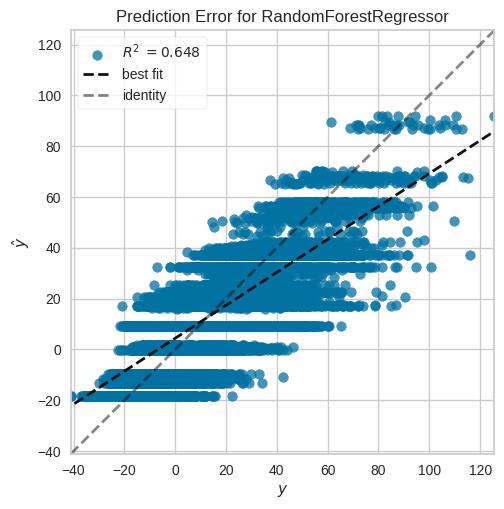

In [43]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

**La línea negra (best fit), releja el mejor ajuste y la línea gris nuestro modelo, se puede visualizar que tanto el modelo esta generalizando**

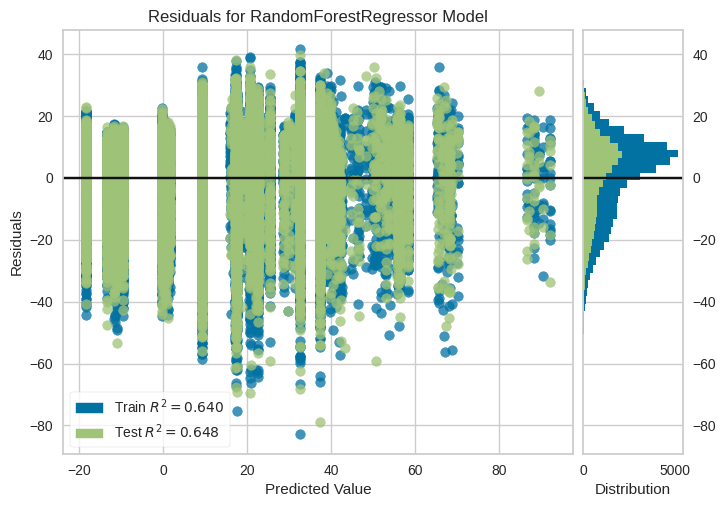

In [44]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

In [45]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([5.46444035, 4.67949057, 3.34521794, 3.35530472, 4.21550417]),
 'score_time': array([0.10180402, 0.06108499, 0.06279302, 0.07577872, 0.17133093]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

**CLASE CUATRO**